In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from helpers.texts import *

### Loading datasets

In [2]:
tennis_questions = pd.read_csv('test_datasets\questions.tsv.gz', sep='\t', compression='gzip').dropna()
display(tennis_questions.sample(5))

big_bang_theory = pd.read_csv('test_datasets/big_bang_theory.csv').dropna()
display(big_bang_theory.sample(5))

,questions,ranking,similarity,gender
1898,hours putting gym day,419,0.757617,M
2820,believe --ENT-- times noticed girls tennis spo...,497,0.294903,M
2763,acted keeping --ENT-- --ENT-- disappointment w...,285,0.671789,M
1054,--ENT-- --ENT-- system,552,0.346410,F
877,change match choices second set tiebreak,368,0.280040,F


,season,episode,scene,character,text,id,formatted_text,number of words
38232,9,1,Outside Amy’s apartment,Amy,There’s no guy.,S09E01,there s no guy,5
5578,2,9,The lobby,Penny,Please don’t do that.,S02E09,please don t do that,6
23238,5,23,Bernadette’s father’s house,Howard,Uh-huh.,S05E23,uh huh,3
31024,7,15,The apartment,Penny,"Aw, jewellery. Oh, my God, Lakers tickets?",S07E15,aw jewellery oh my god lakers tickets,12
5497,2,8,The girl’s apartment,Leonard,I’m hoping that’s three different guys.,S02E08,i m hoping that s three different guys,9


### Binary classification

In this first example, we show how to use the helper functions to perform binary classification (i.e. predicting labels than can only take two values, here either "M" or "F").

In [3]:
tp, fp, fn, tn = binary_classify_based_on_text(
    df=tennis_questions,
    text_col_name='questions',
    label_col_name='gender',
)

accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f"The accuracy of the model for predicting the gender based on the question is: {accuracy:.2%}")
print(f"Number of estimations made: {tp + tn + fp + fn}")

Information: This function is currently using 'LogisticRegression'. You may want to change this to 'SGDClassifier' depending on the task.
The accuracy of the model for predicting the gender based on the question is: 71.67%
Number of estimations made: 1200


### Regression

In this second example, we show how to use the helper functions to perform regression (i.e. predicting a continuous variable).

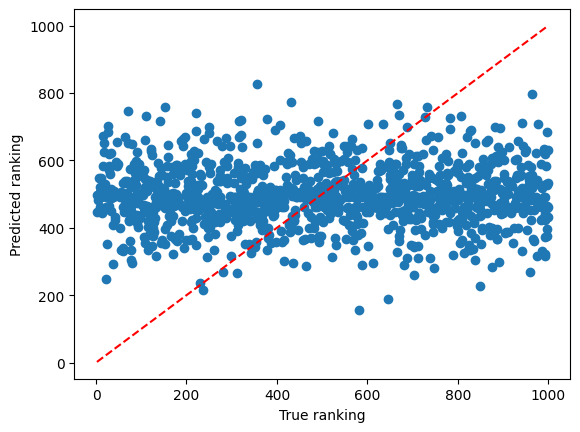

In [4]:
y_true, y_pred = regression_based_on_text(
    df=tennis_questions,
    text_col_name='questions',
    label_col_name='ranking',
)
plt.scatter(y_true, y_pred)
plt.plot([np.min(y_true), np.max(y_true)], [np.min(y_true), np.max(y_true)], 'r--')
plt.xlabel('True ranking')
plt.ylabel('Predicted ranking')
plt.show()

### Multi-class classification

In this third example, we show how to use the helper functions to perform multi-class classification (i.e. predicting labels than can take more than two values, here one class for each character of the TV show "Big Bang Theory").

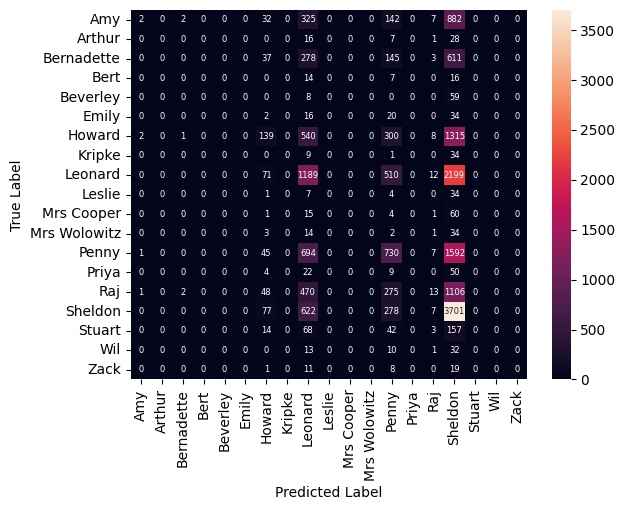

In [11]:
cm, classes = classify_based_on_text(
    df=big_bang_theory,
    text_col_name='formatted_text',
    label_col_name='character',
)

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    xticklabels=classes,
    yticklabels=classes,
    annot_kws={"size": 6}
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()